# CROSS VALIDATION

Utilizado para garantir a validação do modelo de Machine Learning usado para os dados reais. O modelo deve sempre entender e corrigir a maioria dos padrões de dados, não deve capturar muitas distorções ou ruídos, ou seus vieses e baixas variações.

Exemplo do uso de validação cruzada para calcular as curvas de validação de uma classe de modelos em um modelo de *regressão polinomial* - modelo linear generalizado, em que o grau dos polinômios é um parâmetro configurável.

Por exemplo, um polinômio de grau 1 ajusta uma linha reta aos dados; para os parâmetros do modelo $a$ y $b$:

$$
y = ax + b
$$

Um polinômio de grau 3 ajusta uma curva cúbica aos dados; para parâmetros $a, b, c, d$: 

$$
y = ax^3 + bx^2 + cx + d
$$

Isso pode ser generalizado a qualquer número de recursos polinomiais.

Em Scikit-Learn, é possível implementar esse modelo com uma simples regressão linear combinada com o pré-processador polinomial (polynomial preprocessor).

In [2]:
#importando as bibliotecas
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [3]:
#criando dados sintéticos

import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

(-2, 12)

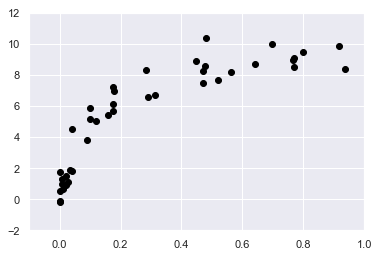

In [11]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)


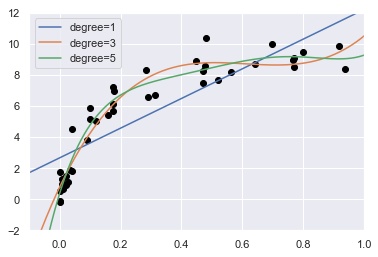

In [9]:
#visualizando os dados junto com o ajuste polinomial de vários graus

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

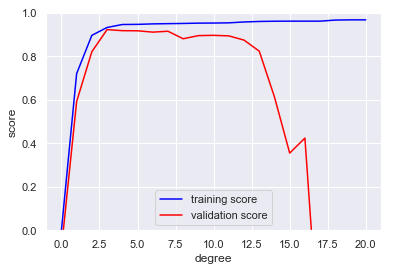

In [12]:
#calculando o score de treinamento e o score de validação ao longo do intervalo

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree'
, degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

__o score de treinamento sempre é maior que o score de validação;__

__o score de treinamento cresce lentamente junto com a complexidade do modelo;__

__e o score de validação atinge um máximo antes de finalmente começar a cair à medida que o modelo é superajustado.__

A partir da curva de validação, é possível interpretar que o compromisso ideal entre viés e variância é encontrado com um polinômio de terceira ordem; podemos calcular e mostrar esse ajuste sobre os dados originais: 

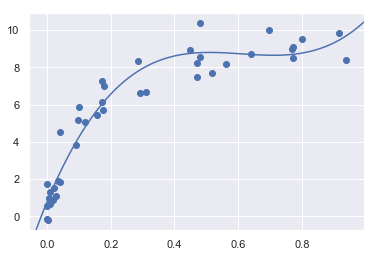

In [13]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);